<a href="https://colab.research.google.com/github/JulioCezar1111/Projeto22/blob/main/gat_vs_dog_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cats vs Dogs (Kaggle)**
https://www.kaggle.com/c/dogs-vs-cats/

# **Pré-processamento**

# **Grid de Images**

In [ ]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

# **Carregar imagens do diretório**

In [ ]:
import os # modulo de sistema operacional
#current_dir = os.path.abspath(os.getcwd()) # pega o diretorio da pasta do projeto
#current_dir



current_dir = '/content/drive/MyDrive/Gat_vs_dog'

In [ ]:
import glob
original_path = current_dir + '/train'
dog_img_files = glob.glob(original_path + '/dog.*')

# **Exibir 9 imagens de cachorros aleatórias**


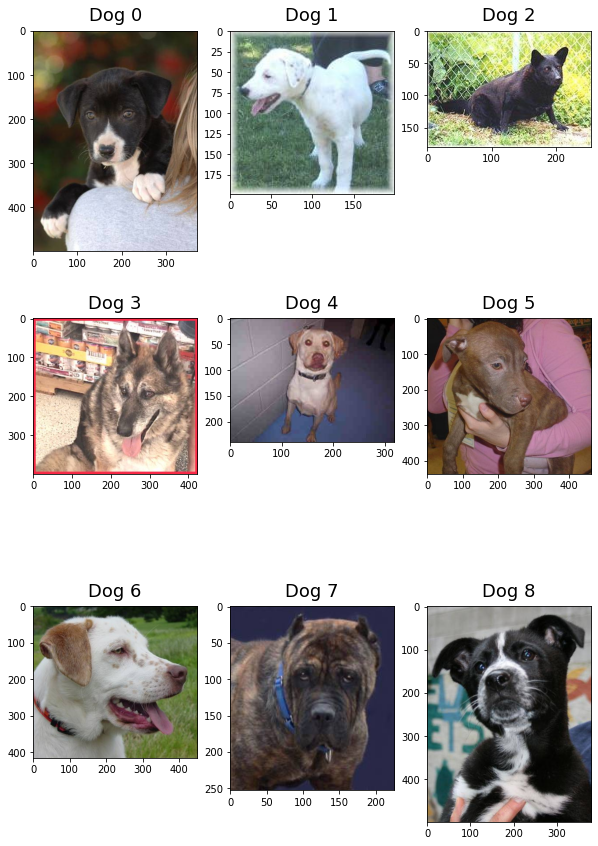

In [ ]:
import random
import cv2

random_dog_imgs = [cv2.imread(img_file) for img_file in random.sample(dog_img_files, 9)] # sorteia 9 imagem
random_dog_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in random_dog_imgs]
titles = ['Dog ' + str(i) for i in range(9)]
showMultipleImages(random_dog_imgs, titles, (10, 15), 3, 3)

# **Converter base de dados para treino, validação e teste**

In [ ]:
#cria nova pasta para cachorros e gatos atendendo a estrutura do Keras/Tensorflow
folder = "/cats_and_dogs_dataset" # pasta da base de dados para o tensorflow
train_folder = current_dir + folder + "/train"
val_folder = current_dir + folder + "/validation"
test_folder = current_dir + folder + "/test"


In [ ]:
import os

# Criando pastas vazias
os.mkdir(current_dir + folder) #cria nova pasta do dataset
os.mkdir(train_folder) #cria nova pasta de treino
os.mkdir(val_folder) #cria nova pasta de validação
os.mkdir(test_folder) #cria nova pasta de teste

new_folder_train_dogs = train_folder + "/dogs"
new_folder_train_cats = train_folder + "/cats"
new_folder_val_dogs = val_folder + "/dogs"
new_folder_val_cats = val_folder + "/cats"
new_folder_test_dogs = test_folder + "/dogs"
new_folder_test_cats = test_folder + "/cats"

os.mkdir(new_folder_train_dogs)
os.mkdir(new_folder_train_cats)
os.mkdir(new_folder_val_dogs)
os.mkdir(new_folder_val_cats)
os.mkdir(new_folder_test_dogs)
os.mkdir(new_folder_test_cats)

In [ ]:
import shutil

percent_val = 0.10
percent_test = 0.20

def moveImagesToCorrectFolder(): # sorteia as imagens que vão para as pastas

    #lista dos arquivos onde encontram-se atualmente
    dog_train_files = glob.glob(original_path + '/dog.*')
    cat_train_files = glob.glob(original_path + '/cat.*')

    #para cada imagem de cachorro, mover para a pasta correta
    for f in dog_train_files:
      
        rand_val = random.random()
        filename = f.split('/')[-1] #de um endereço como C:\\modelo\\img1.jpg, pega só o img1.jpg

        if rand_val <= percent_val: #10% das imagens vão para val
            shutil.move(f, new_folder_val_dogs + '/' + filename) #move de origem para val de cachorro

        elif rand_val > percent_val and rand_val <= percent_val + percent_test:
            shutil.move(f, new_folder_test_dogs + '/' + filename) #move de origem para teste de cachorro

        else:
            shutil.move(f, new_folder_train_dogs + '/' + filename) #move de origem para treino de cachorro

    #para cada imagem de gato, mover para a pasta correta
    for f in cat_train_files:

        rand_val = random.random()
        filename = f.split('/')[-1] #de um endereço como C:\\modelo\\img1.jpg, pega só o img1.jpg

        if rand_val <= percent_val: #10% das imagens vão para val
            shutil.move(f, new_folder_val_cats + '/' + filename) #move de origem para val de gato

        elif rand_val > percent_val and rand_val <= percent_val + percent_test:
            shutil.move(f, new_folder_test_cats + '/' + filename) #move de origem para teste de gato
            
        else:
            shutil.move(f, new_folder_train_cats + '/' + filename) #move de origem para treino de gato
        
moveImagesToCorrectFolder()
os.rmdir(original_path)

OSError: ignored